In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
import numpy as np
def softmax_regression_loss(X, Y, W, b):
    """
    Compute the softmax regression loss and its gradient with respect to W and b.

    Arguments:
    X -- input data of shape (num_features, num_samples)
    Y -- true "label" vector of shape (num_classes, num_samples)
    W -- weights matrix of shape (num_classes, num_features)
    b -- bias vector of shape (num_classes,)

    Returns:
    loss -- softmax regression loss
    dW -- gradient of the loss with respect to W, same shape as W
    db -- gradient of the loss with respect to b, same shape as b
    """

    # Compute scores
    scores = np.dot(W, X) + b.reshape(-1, 1)

    # Compute softmax probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=0)

    # Compute loss
    num_samples = X.shape[1]
    loss = -np.sum(Y * np.log(probs)) / num_samples

    # Compute gradients
    dW = np.dot((probs - Y), X.T) / num_samples
    db = np.sum(probs - Y, axis=1) / num_samples

    return loss, dW, db


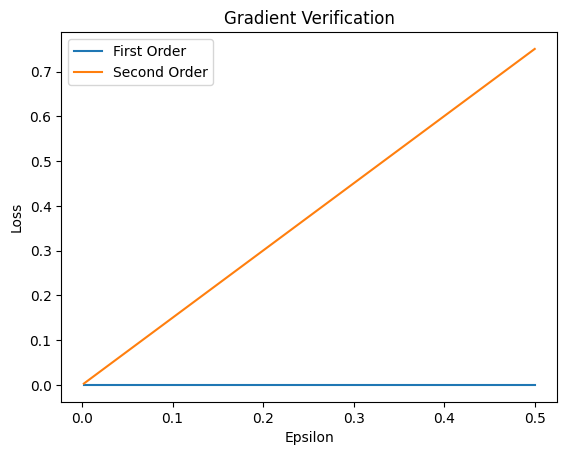

In [14]:
def grad_verification():
    # Generate random X, Y, W, b matching the dimensions in the above function signature:
    num_features = 5
    num_classes = 3
    num_samples = 10
    X = np.random.rand(num_features, num_samples)
    Y = np.random.rand(num_classes, num_samples)
    W = np.random.rand(num_classes, num_features)
    b = np.random.rand(num_classes,)
    # create a decending array of epsilon values:
    epsilons = np.array([(0.5)**i for i in range(1, 10)])
    

    losses_ord1 = []
    losses_ord2 = []
    for epsilon in epsilons:
        # increment W by epsilon:
        W_plus = W + epsilon
        loss_plus, _, _ = softmax_regression_loss(X, Y, W_plus, b)
        loss, _, _ = softmax_regression_loss(X, Y, W, b)
        loss_ord1 = loss_plus - loss
        loss_ord2 = loss_ord1 - epsilon*loss
        loss_ord1_abs = np.abs(loss_ord1)
        loss_ord2_abs = np.abs(loss_ord2)
        losses_ord1.append(loss_ord1_abs)
        losses_ord2.append(loss_ord2_abs)

    #plot the results:
    plt.plot(epsilons, losses_ord1, label='First Order')
    plt.plot(epsilons, losses_ord2, label='Second Order')
    plt.xlabel('Epsilon')
    plt.ylabel('Loss')
    plt.title('Gradient Verification')
    plt.legend()
    plt.show()

grad_verification()

    

    
